# Generate Sinusoidal Data with Hourly Timestamps

This notebook generates a CSV file with sinusoidal and cosine waves with hourly timestamps, similar to the ETTh1.csv format.

In [15]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import os

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Configuration Parameters

Modify these parameters to control the data generation:

In [16]:
# Configuration parameters
num_samples = 200000  # Number of samples to generate
start_date = "2024-01-01 00:00:00"  # Starting date
output_dir = "/home/sa53869/time-series/moirai/time-moe-eval/"
filename = "synthetic_sinusoidal.csv"

print(f"Configuration:")
print(f"Number of samples: {num_samples}")
print(f"Start date: {start_date}")
print(f"Output directory: {output_dir}")
print(f"Output filename: {filename}")

Configuration:
Number of samples: 200000
Start date: 2024-01-01 00:00:00
Output directory: /home/sa53869/time-series/moirai/time-moe-eval/
Output filename: synthetic_sinusoidal.csv


## Data Generation Function

In [17]:
def generate_sinusoidal_data(num_samples, start_date, output_dir, filename):
    """
    Generate synthetic sinusoidal and cosine wave data with hourly timestamps.
    64 points per 1 complete period for precise control.
    Includes a third column with sine wave + exactly one random spike per period.
    Includes a fourth column with sine wave + spikes at fixed 80% location per period.
    """
    
    # Create hourly timestamps
    start_dt = pd.to_datetime(start_date)
    timestamps = [start_dt + timedelta(hours=i) for i in range(num_samples)]
    
    # Generate time array for wave calculations 
    # 64 points per period means: 2π per 64 samples = π/32 per sample
    # For num_samples: 2π * (num_samples/64) = π * (num_samples/32)
    t = np.linspace(0, 2 * np.pi * (num_samples/64), num_samples)
    
    # Generate smooth sinusoidal wave
    sin_wave = 3 * np.sin(t) + 6
    
    # Generate smooth cosine wave
    cos_wave = 3 * np.cos(t) + 6
    
    # Generate sine wave + exactly one random spike per period
    np.random.seed(42)  # For reproducible results
    spike_magnitude = 10  # Large spikes for clear visibility
    samples_per_period = 64
    
    # Create the random spike component: exactly one spike per period at random location
    random_spike_component = np.zeros(num_samples)
    
    period_count = 0
    current_period_start = 0
    
    while current_period_start < num_samples:
        period_end = min(current_period_start + samples_per_period, num_samples)
        period_length = period_end - current_period_start
        
        # Only add spike if we have a reasonable period length (at least 10 samples)
        if period_length >= 10:
            # Choose random position within this period
            spike_position_in_period = np.random.randint(0, period_length)
            spike_position = current_period_start + spike_position_in_period
            
            # Choose random spike direction (positive or negative)
            spike_direction = np.random.choice([-1, 1])
            
            # Add the spike
            random_spike_component[spike_position] = spike_magnitude * spike_direction
        
        # Move to next period
        current_period_start += samples_per_period
        period_count += 1
    
    # Create the third column: sine wave + random spikes
    sin_wave_with_random_spikes = sin_wave + random_spike_component
    
    # Generate sine wave + fixed position spikes column
    # Create fixed position spike component
    fixed_spike_component = np.zeros(num_samples)
    
    # Reset for fixed spikes
    period_count = 0
    current_period_start = 0
    
    while current_period_start < num_samples:
        # Calculate 80% position in current period (80% of 64 = 51.2, round to 51)
        spike_position = int(current_period_start + 0.8 * samples_per_period)
        
        # Ensure spike position is within bounds
        if spike_position < num_samples:
            # Alternate between positive and negative spikes for variety
            spike_direction = 1 if period_count % 2 == 0 else -1
            fixed_spike_component[spike_position] = spike_magnitude * spike_direction
        
        # Move to next period
        current_period_start += samples_per_period
        period_count += 1
    
    # Create the fourth column: sine wave + fixed position spikes
    sin_wave_with_fixed_spikes = sin_wave + fixed_spike_component
    
    # Count spikes for reporting
    total_random_spikes = np.sum(random_spike_component != 0)
    total_fixed_spikes = np.sum(fixed_spike_component != 0)
    total_periods = int(np.ceil(num_samples / samples_per_period))
    
    print(f"Generated {total_random_spikes} random spikes (exactly 1 per period, {total_periods} periods)")
    print(f"Generated {total_fixed_spikes} fixed spikes at 80% position per period")
    
    # Create DataFrame with sin, cos waves and both spike columns
    df = pd.DataFrame({
        'date': timestamps,
        'SIN_WAVE': sin_wave,
        'COS_WAVE': cos_wave,
        'SIN_WITH_RANDOM_SPIKES': sin_wave_with_random_spikes,
        'SIN_WITH_FIXED_SPIKES': sin_wave_with_fixed_spikes
    })
    
    # Ensure output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Save to CSV
    output_path = os.path.join(output_dir, filename)
    df.to_csv(output_path, index=False)
    
    print(f"Generated {num_samples} samples of smooth sinusoidal data with controlled spikes")
    print(f"Data saved to: {output_path}")
    print(f"Data shape: {df.shape}")
    print(f"Date range: {df['date'].min()} to {df['date'].max()}")
    print(f"Frequency: 64 points per complete period")
    print(f"Number of complete periods: {num_samples / 64:.2f}")
    print(f"Spike magnitude: ±{spike_magnitude}")
    print(f"Random spikes: exactly 1 per period at random location")
    print(f"Fixed spikes: at 80% position per period (sample 51 of each 64-sample period)")
    
    return df, output_path

## Generate the Data

In [18]:
# Generate the data
print("Generating smooth sinusoidal data...")
df, output_path = generate_sinusoidal_data(
    num_samples=num_samples,
    start_date=start_date,
    output_dir=output_dir,
    filename=filename
)

# Display first few rows
print("\nFirst 10 rows of generated data:")
df.head(10)

Generating smooth sinusoidal data...
Generated 3125 random spikes (exactly 1 per period, 3125 periods)
Generated 3125 fixed spikes at 80% position per period
Generated 3125 random spikes (exactly 1 per period, 3125 periods)
Generated 3125 fixed spikes at 80% position per period
Generated 200000 samples of smooth sinusoidal data with controlled spikes
Data saved to: /home/sa53869/time-series/moirai/time-moe-eval/synthetic_sinusoidal.csv
Data shape: (200000, 5)
Date range: 2024-01-01 00:00:00 to 2046-10-25 07:00:00
Frequency: 64 points per complete period
Number of complete periods: 3125.00
Spike magnitude: ±10
Random spikes: exactly 1 per period at random location
Fixed spikes: at 80% position per period (sample 51 of each 64-sample period)

First 10 rows of generated data:
Generated 200000 samples of smooth sinusoidal data with controlled spikes
Data saved to: /home/sa53869/time-series/moirai/time-moe-eval/synthetic_sinusoidal.csv
Data shape: (200000, 5)
Date range: 2024-01-01 00:00:00

,date,SIN_WAVE,COS_WAVE,SIN_WITH_RANDOM_SPIKES,SIN_WITH_FIXED_SPIKES
0,2024-01-01 00:00:00,6.000000,9.000000,6.000000,6.000000
1,2024-01-01 01:00:00,6.294053,8.985554,6.294053,6.294053
2,2024-01-01 02:00:00,6.585274,8.942355,6.585274,6.585274
3,2024-01-01 03:00:00,6.870858,8.870820,6.870858,6.870858
4,2024-01-01 04:00:00,7.148056,8.771636,7.148056,7.148056
5,2024-01-01 05:00:00,7.414197,8.645760,7.414197,7.414197
6,2024-01-01 06:00:00,7.666718,8.494404,7.666718,7.666718
7,2024-01-01 07:00:00,7.903188,8.319025,7.903188,7.903188
8,2024-01-01 08:00:00,8.121329,8.121312,8.121329,8.121329
9,2024-01-01 09:00:00,8.319040,7.903170,8.319040,8.319040


## Data Overview and Statistics

In [19]:
# Display data info
print("Data Info:")
print("=" * 30)
print(df.info())

print("\nData Statistics:")
print("=" * 30)
df.describe()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   date                    200000 non-null  datetime64[ns]
 1   SIN_WAVE                200000 non-null  float64       
 2   COS_WAVE                200000 non-null  float64       
 3   SIN_WITH_RANDOM_SPIKES  200000 non-null  float64       
 4   SIN_WITH_FIXED_SPIKES   200000 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.6 MB
None

Data Statistics:


,date,SIN_WAVE,COS_WAVE,SIN_WITH_RANDOM_SPIKES,SIN_WITH_FIXED_SPIKES
count,200000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2035-05-29 15:30:00.000000768,6.000000,6.000015,5.997550,6.000050
min,2024-01-01 00:00:00,3.000000,3.000000,-6.999999,-6.870772
25%,2029-09-14 07:45:00,3.878696,3.878705,3.851417,3.931413
50%,2035-05-29 15:30:00,6.000000,6.000024,6.000259,6.073624
75%,2041-02-09 23:15:00,8.121304,8.121329,8.147012,8.172742
max,2046-10-25 07:00:00,9.000000,9.000000,18.999992,13.228355
std,NaN,2.121320,2.121331,2.466798,2.462159


## Visualization

### Sinusoidal, Cosine Waves and Controlled Spike Patterns (64 points per period)

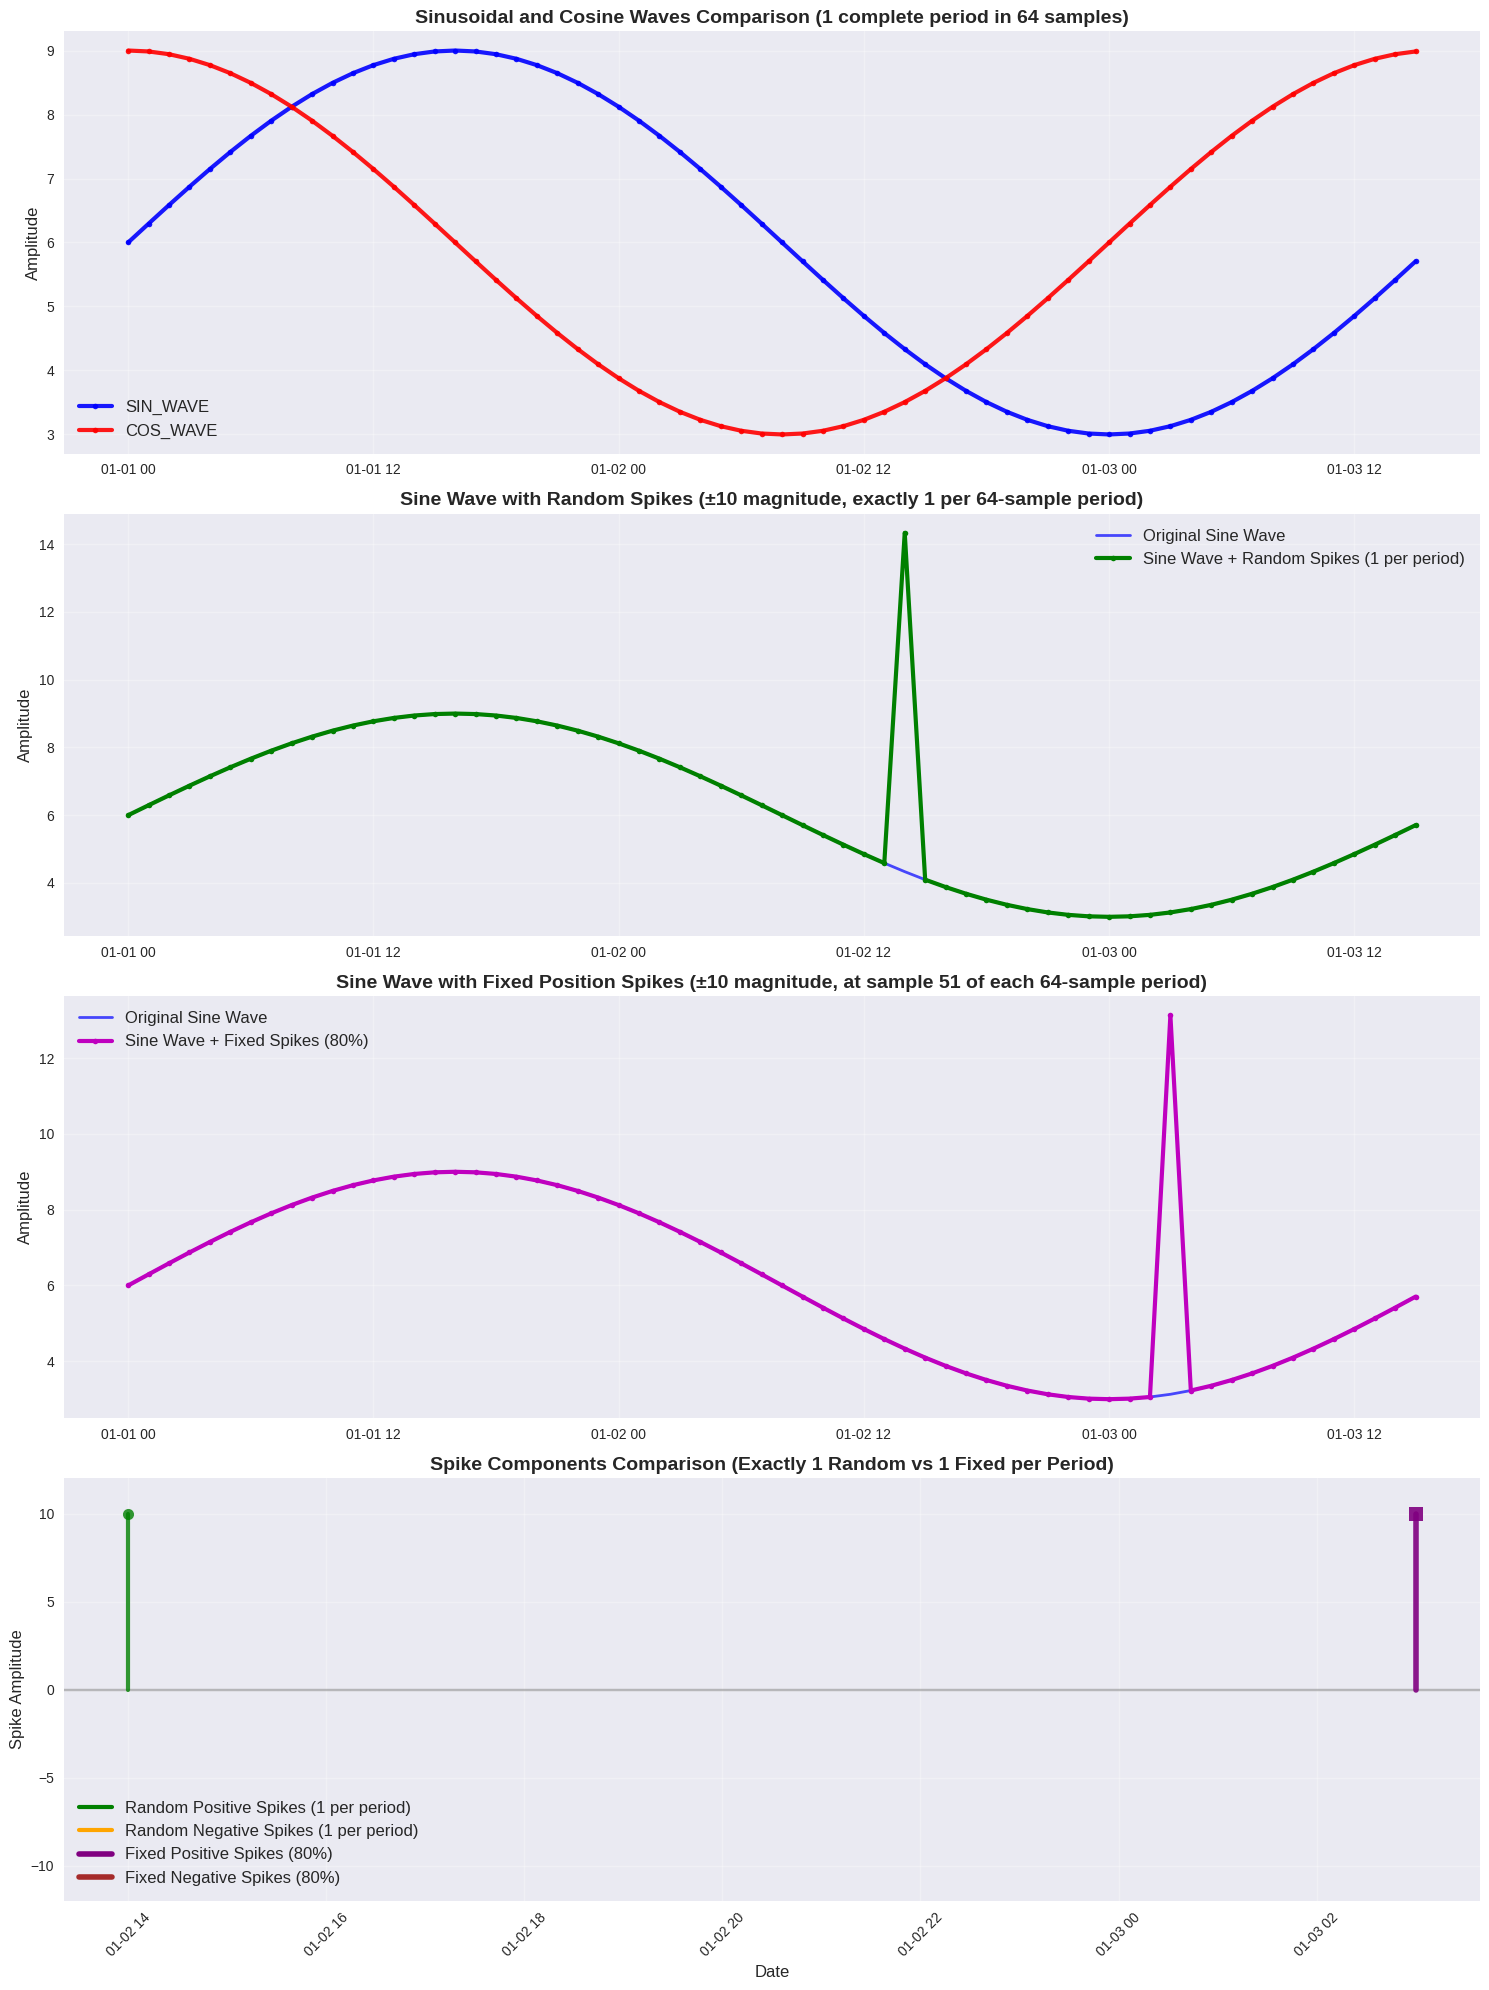


Spike Statistics in First 64 Samples (1 complete period):
Random Spikes (1 per period):
  Total spikes: 1
  Positive spikes: 1
  Negative spikes: 0
  Expected: exactly 1 spike per 64-sample period
  Actual spike positions: [38]
Fixed Position Spikes (80% per period = sample 51):
  Total spikes: 1
  Positive spikes: 1
  Negative spikes: 0
  Expected position: sample 51 of 64 (80% of period)
  Actual spike positions: [51]


In [20]:
# Plot sin, cos waves and both spike variations comparison
fig, axes = plt.subplots(4, 1, figsize=(15, 20))

# Plot first 64 samples to show 1 complete period
plot_samples = min(64, len(df))
plot_df = df.head(plot_samples)

# Top plot: Sin and Cos waves
wave_columns = ['SIN_WAVE', 'COS_WAVE']
colors = ['blue', 'red']

for i, (col, color) in enumerate(zip(wave_columns, colors)):
    axes[0].plot(plot_df['date'], plot_df[col], linewidth=3, label=col, color=color, alpha=0.9, marker='o', markersize=4)

axes[0].set_title('Sinusoidal and Cosine Waves Comparison (1 complete period in 64 samples)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Amplitude', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0].legend(fontsize=12)

# Second plot: Sin wave with random spikes (exactly 1 per period)
axes[1].plot(plot_df['date'], plot_df['SIN_WAVE'], 'b-', linewidth=2, label='Original Sine Wave', alpha=0.7)
axes[1].plot(plot_df['date'], plot_df['SIN_WITH_RANDOM_SPIKES'], 'g-', linewidth=3, label='Sine Wave + Random Spikes (1 per period)', marker='o', markersize=4)

axes[1].set_title('Sine Wave with Random Spikes (±10 magnitude, exactly 1 per 64-sample period)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Amplitude', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].legend(fontsize=12)

# Third plot: Sin wave with fixed position spikes
axes[2].plot(plot_df['date'], plot_df['SIN_WAVE'], 'b-', linewidth=2, label='Original Sine Wave', alpha=0.7)
axes[2].plot(plot_df['date'], plot_df['SIN_WITH_FIXED_SPIKES'], 'm-', linewidth=3, label='Sine Wave + Fixed Spikes (80%)', marker='o', markersize=4)

axes[2].set_title('Sine Wave with Fixed Position Spikes (±10 magnitude, at sample 51 of each 64-sample period)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Amplitude', fontsize=12)
axes[2].grid(True, alpha=0.3)
axes[2].legend(fontsize=12)

# Bottom plot: Comparison of spike components
random_spike_component = plot_df['SIN_WITH_RANDOM_SPIKES'] - plot_df['SIN_WAVE']
fixed_spike_component = plot_df['SIN_WITH_FIXED_SPIKES'] - plot_df['SIN_WAVE']

# Plot zero line
axes[3].axhline(y=0, color='gray', linestyle='-', alpha=0.5)

# Plot random spikes
random_spike_indices = plot_df[random_spike_component != 0].index
for idx in random_spike_indices:
    spike_value = random_spike_component.loc[idx]
    date_value = plot_df.loc[idx, 'date']
    axes[3].plot([date_value, date_value], [0, spike_value], 
                color='green' if spike_value > 0 else 'orange', 
                linewidth=3, alpha=0.8)
    axes[3].plot(date_value, spike_value, 'o', 
                color='green' if spike_value > 0 else 'orange', 
                markersize=8, alpha=0.8)

# Plot fixed spikes
fixed_spike_indices = plot_df[fixed_spike_component != 0].index
for idx in fixed_spike_indices:
    spike_value = fixed_spike_component.loc[idx]
    date_value = plot_df.loc[idx, 'date']
    axes[3].plot([date_value, date_value], [0, spike_value], 
                color='purple' if spike_value > 0 else 'brown', 
                linewidth=4, alpha=0.9)
    axes[3].plot(date_value, spike_value, 's', 
                color='purple' if spike_value > 0 else 'brown', 
                markersize=10, alpha=0.9)

axes[3].set_title(f'Spike Components Comparison (Exactly 1 Random vs 1 Fixed per Period)', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Date', fontsize=12)
axes[3].set_ylabel('Spike Amplitude', fontsize=12)
axes[3].grid(True, alpha=0.3)
axes[3].set_ylim(-12, 12)  # Set limits to show spike range clearly

# Add legends for spikes
legend_elements = []
if len(random_spike_indices) > 0:
    legend_elements.extend([
        plt.Line2D([0], [0], color='green', linewidth=3, label='Random Positive Spikes (1 per period)'),
        plt.Line2D([0], [0], color='orange', linewidth=3, label='Random Negative Spikes (1 per period)')
    ])
if len(fixed_spike_indices) > 0:
    legend_elements.extend([
        plt.Line2D([0], [0], color='purple', linewidth=4, label='Fixed Positive Spikes (80%)'),
        plt.Line2D([0], [0], color='brown', linewidth=4, label='Fixed Negative Spikes (80%)')
    ])

if legend_elements:
    axes[3].legend(handles=legend_elements, fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show statistics about spikes in the plotted range
random_spike_component_plot = plot_df['SIN_WITH_RANDOM_SPIKES'] - plot_df['SIN_WAVE']
fixed_spike_component_plot = plot_df['SIN_WITH_FIXED_SPIKES'] - plot_df['SIN_WAVE']

random_spike_count = np.sum(random_spike_component_plot != 0)
fixed_spike_count = np.sum(fixed_spike_component_plot != 0)

random_positive_spikes = np.sum(random_spike_component_plot > 0)
random_negative_spikes = np.sum(random_spike_component_plot < 0)
fixed_positive_spikes = np.sum(fixed_spike_component_plot > 0)
fixed_negative_spikes = np.sum(fixed_spike_component_plot < 0)

print(f"\nSpike Statistics in First {plot_samples} Samples (1 complete period):")
print(f"Random Spikes (1 per period):")
print(f"  Total spikes: {random_spike_count}")
print(f"  Positive spikes: {random_positive_spikes}")
print(f"  Negative spikes: {random_negative_spikes}")
print(f"  Expected: exactly 1 spike per 64-sample period")
if random_spike_count > 0:
    random_positions = plot_df[random_spike_component_plot != 0].index.tolist()
    print(f"  Actual spike positions: {random_positions}")

print(f"Fixed Position Spikes (80% per period = sample 51):")
print(f"  Total spikes: {fixed_spike_count}")
print(f"  Positive spikes: {fixed_positive_spikes}")
print(f"  Negative spikes: {fixed_negative_spikes}")
print(f"  Expected position: sample 51 of 64 (80% of period)")
if fixed_spike_count > 0:
    fixed_positions = plot_df[fixed_spike_component_plot != 0].index.tolist()
    print(f"  Actual spike positions: {fixed_positions}")

## Final Summary

In [21]:
print("\n" + "="*60)
print("SUMMARY")
print("="*60)
print(f"✓ Generated {num_samples} samples of smooth sinusoidal data with controlled spikes")
print(f"✓ Data saved to: {output_path}")
print(f"✓ Data shape: {df.shape}")
print(f"✓ Date range: {df['date'].min()} to {df['date'].max()}")
print(f"✓ Columns: {list(df.columns)}")
print("✓ Visualization: Generated waves and controlled spike comparison displayed")

# Calculate and display spike statistics
random_spike_component = df['SIN_WITH_RANDOM_SPIKES'] - df['SIN_WAVE']
total_random_spikes = np.sum(random_spike_component != 0)
random_positive_spikes = np.sum(random_spike_component > 0)
random_negative_spikes = np.sum(random_spike_component < 0)

print(f"\nWave Configuration:")
print(f"  • Frequency: 64 points per complete period")
print(f"  • Total periods in dataset: {num_samples / 64:.2f}")
print(f"  • Sine wave amplitude: 3 (range: 3 to 9)")
print(f"  • Cosine wave amplitude: 3 (range: 3 to 9)")

print(f"\nSpike Configuration:")
print(f"  • Random spikes: exactly 1 per 64-sample period at random location")
print(f"  • Fixed spikes: exactly 1 per 64-sample period at position 51 (80%)")
print(f"  • Spike magnitude: ±10")

print(f"\nRandom Spike Statistics:")
print(f"  • Total random spikes: {total_random_spikes:,}")
print(f"  • Positive spikes (+10): {random_positive_spikes:,}")
print(f"  • Negative spikes (-10): {random_negative_spikes:,}")
print(f"  • Expected total: {int(num_samples / 64)} (1 per period)")
print(f"  • Spike density: 1 spike per 64 samples = {(1/64)*100:.2f}% coverage")

# Calculate fixed spike statistics
fixed_spike_component = df['SIN_WITH_FIXED_SPIKES'] - df['SIN_WAVE']
total_fixed_spikes = np.sum(fixed_spike_component != 0)
fixed_positive_spikes = np.sum(fixed_spike_component > 0)
fixed_negative_spikes = np.sum(fixed_spike_component < 0)
expected_fixed_spikes = int(num_samples / 64)  # One spike per 64-sample period

print(f"\nFixed Spike Statistics:")
print(f"  • Total fixed spikes: {total_fixed_spikes} (expected: {expected_fixed_spikes})")
print(f"  • Positive spikes (+10): {fixed_positive_spikes:,}")
print(f"  • Negative spikes (-10): {fixed_negative_spikes:,}")
print(f"  • Fixed spike position: sample 51 of each 64-sample period (80%)")

print(f"\nData Range Statistics:")
print(f"  • SIN_WAVE range: [{df['SIN_WAVE'].min():.2f}, {df['SIN_WAVE'].max():.2f}]")
print(f"  • COS_WAVE range: [{df['COS_WAVE'].min():.2f}, {df['COS_WAVE'].max():.2f}]")
print(f"  • SIN_WITH_RANDOM_SPIKES range: [{df['SIN_WITH_RANDOM_SPIKES'].min():.2f}, {df['SIN_WITH_RANDOM_SPIKES'].max():.2f}]")
print(f"  • SIN_WITH_FIXED_SPIKES range: [{df['SIN_WITH_FIXED_SPIKES'].min():.2f}, {df['SIN_WITH_FIXED_SPIKES'].max():.2f}]")

print(f"\nGenerated files:")
print(f"  - CSV data: {filename}")
print("\nThe sinusoidal data with controlled spike patterns is ready for analysis!")
print("• SIN_WAVE: Smooth sinusoidal wave (3 amplitude, 64 points per period)")
print("• COS_WAVE: Smooth cosine wave (3 amplitude, 64 points per period)")
print("• SIN_WITH_RANDOM_SPIKES: Sine wave + exactly 1 random spike per period (±10 magnitude)")
print("• SIN_WITH_FIXED_SPIKES: Sine wave + exactly 1 fixed spike per period at 80% position")


SUMMARY
✓ Generated 200000 samples of smooth sinusoidal data with controlled spikes
✓ Data saved to: /home/sa53869/time-series/moirai/time-moe-eval/synthetic_sinusoidal.csv
✓ Data shape: (200000, 5)
✓ Date range: 2024-01-01 00:00:00 to 2046-10-25 07:00:00
✓ Columns: ['date', 'SIN_WAVE', 'COS_WAVE', 'SIN_WITH_RANDOM_SPIKES', 'SIN_WITH_FIXED_SPIKES']
✓ Visualization: Generated waves and controlled spike comparison displayed

Wave Configuration:
  • Frequency: 64 points per complete period
  • Total periods in dataset: 3125.00
  • Sine wave amplitude: 3 (range: 3 to 9)
  • Cosine wave amplitude: 3 (range: 3 to 9)

Spike Configuration:
  • Random spikes: exactly 1 per 64-sample period at random location
  • Fixed spikes: exactly 1 per 64-sample period at position 51 (80%)
  • Spike magnitude: ±10

Random Spike Statistics:
  • Total random spikes: 3,125
  • Positive spikes (+10): 1,538
  • Negative spikes (-10): 1,587
  • Expected total: 3125 (1 per period)
  • Spike density: 1 spike per 6